In [1]:
import networkx as nx
import itertools as it
from collections import Counter

g = nx.read_edgelist("1.graph.txt", nodetype=int)

%time max_comp = max(nx.connected_component_subgraphs(g), key=lambda _: _.number_of_nodes())
%time pathes = nx.networkx.shortest_path_length(max_comp)

%time cnt = Counter(pathes[u][v] for (u, v) in it.combinations(max_comp.nodes(), 2))
print("diameter(G): {}".format(max(cnt.keys())))

CPU times: user 340 ms, sys: 16 ms, total: 356 ms
Wall time: 355 ms
CPU times: user 58.1 s, sys: 584 ms, total: 58.6 s
Wall time: 58 s
CPU times: user 2.26 s, sys: 16 ms, total: 2.28 s
Wall time: 2.25 s
diameter(G): 11


In [2]:
data = []
det = float(sum(cnt.values()))
for i in range(1, 12):
    data.append((i, sum(cnt[j] for j in range(1, 12) if j <= i) / det))

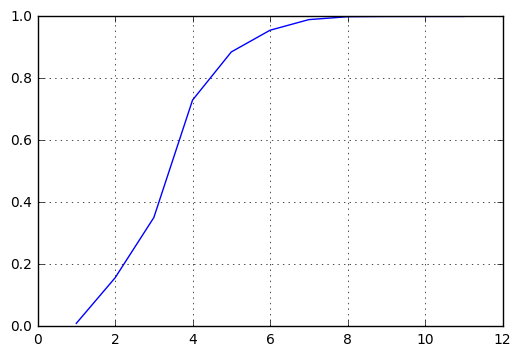

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

x, y = zip(*data)
plt.plot(x, y)
plt.grid()
plt.show()